Running Spectroscopy Scan...
Scan Complete.


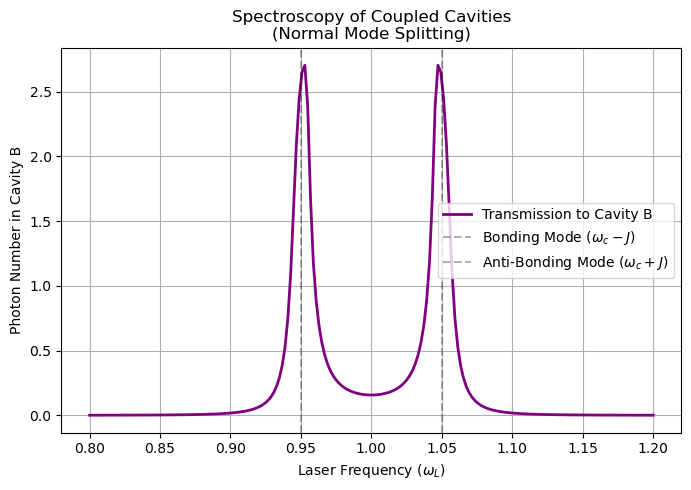

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def build_driven_coupled_cavities(N, w_c, J, F, w_laser):
    delta = w_c - w_laser
    
    a = tensor(destroy(N), qeye(N))
    b = tensor(qeye(N), destroy(N))
    
    # 1. Hamiltonian in Rotating Frame
    # The cavity energy becomes 'delta' instead of 'w_c'
    H_a = delta * a.dag() * a
    H_b = delta * b.dag() * b
    
    # Hopping (Interaction)
    # Using the convention from your notebook (interaction g)
    H_hop = J * (a.dag() * b + a * b.dag())
    
    # Laser Drive on Cavity A only
    # F is the driving strength
    H_drive = F * (a.dag() + a)
    
    H = H_a + H_b + H_hop + H_drive
    return H, b

# --- Parameters ---
N = 8             # Hilbert space size
w_c = 1.0           # Cavity Resonance Frequency
J = 0.05            # Hopping Strength (Coupling)
F = 0.02            # Laser Driving Strength
kappa = 0.01        # Decay rate (linewidth)

# Sweep the laser frequency across the resonance
# We scan from w_c - 0.2 to w_c + 0.2
w_laser_list = np.linspace(w_c - 0.2, w_c + 0.2, 200)

n_b_steady = []

print("Running Spectroscopy Scan...")

# --- Loop over Laser Frequencies ---
for w_L in w_laser_list:
    H, b = build_driven_coupled_cavities(N, w_c, J, F, w_L)
    
    # Collapse operators (both cavities leak)
    c_ops = [np.sqrt(kappa) * tensor(destroy(N), qeye(N)), 
             np.sqrt(kappa) * tensor(qeye(N), destroy(N))]
    
    # SOLVER: steadystate() finds the state at t -> infinity
    rho_ss = steadystate(H, c_ops)
    
    # Measure photons in Cavity B (Transmission)
    n_b = expect(b.dag() * b, rho_ss)
    n_b_steady.append(n_b)

print("Scan Complete.")

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 5))

# Plot Transmission
ax.plot(w_laser_list, n_b_steady, color="purple", lw=2, label="Transmission to Cavity B")

# Mark the expected peaks at +/- J
ax.axvline(w_c - J, color='k', linestyle='--', alpha=0.3, label="Bonding Mode ($\omega_c - J$)")
ax.axvline(w_c + J, color='k', linestyle='--', alpha=0.3, label="Anti-Bonding Mode ($\omega_c + J$)")

ax.set_xlabel("Laser Frequency ($\omega_L$)")
ax.set_ylabel("Photon Number in Cavity B")
ax.set_title("Spectroscopy of Coupled Cavities\n(Normal Mode Splitting)")
ax.legend()
ax.grid(True)

plt.show()